## 🐧 Lab 5: Waddling Into Data

Hey Hey! In this lab, you will continue analyzing data visualizations 😀

Each section includes a pre-written chart and guiding questions to help you think critically about what the visualization shows.

Your goal is to answer the questions based upon the charts.

## Integrity

Write your own responses. If you use any outside sources, including AI tools, be sure to **cite them** and briefly explain **where and how** they were used.


In [1]:
# Setup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 5)

# Load seaborn penguins dataset
df = sns.load_dataset("penguins")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## 1) Histogram — Distribution of a Numeric Feature

**Instructions:** Plot the histogram by running the cell below.

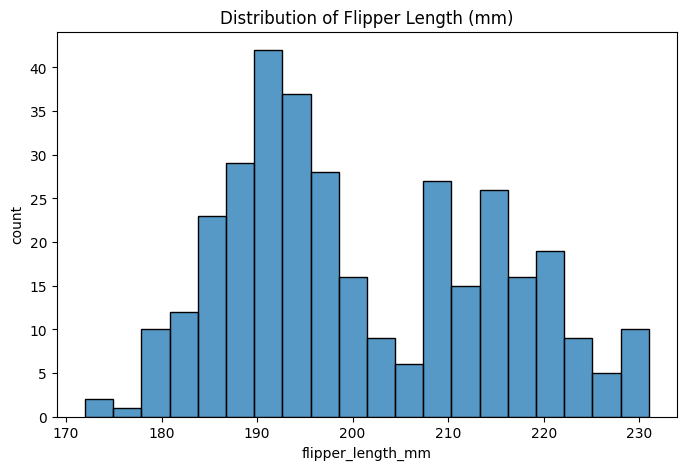

In [2]:
# Histogram
sns.histplot(data=df, x="flipper_length_mm", bins=20, kde=False)
plt.title("Distribution of Flipper Length (mm)")
plt.xlabel("flipper_length_mm"); plt.ylabel("count")
plt.show()

**Questions:**
- Where do most penguins’ flipper lengths seem to fall?
- If you were comparing two species of penguins, how might you use this type of chart to help you?
- If you wanted to describe an average penguin in this dataset, what flipper length would you mention?

**Answers (Respond with 2-3 sentences per each question):**
-
- Most penguins flipper lengths seem to fall between 180mm to 200mm, with 2 peaks around 190mm and 210mm. This indicates there might be two distinct groups of penguins with different flipper length.
- This chart can be used to compare the distribuion of flipper lenghts between two species by plotting their histograms on the same axes. You could see if their distributions overlap or if one species tends to have significantly longer or shorter flippers than the other.
- Based on the peaks in the histogram, you could mention a flipper length around 190mm or 208mm as representing an average penguin in this dataset, depending on which group you are referring to. More precisely, you could calculate the mean or median of the flipper lengths for a more specific average.

## 2) Correlation Matrix — Relationships Among Numeric Features


**Instructions:** Run the cell below to display the correlation matrix!

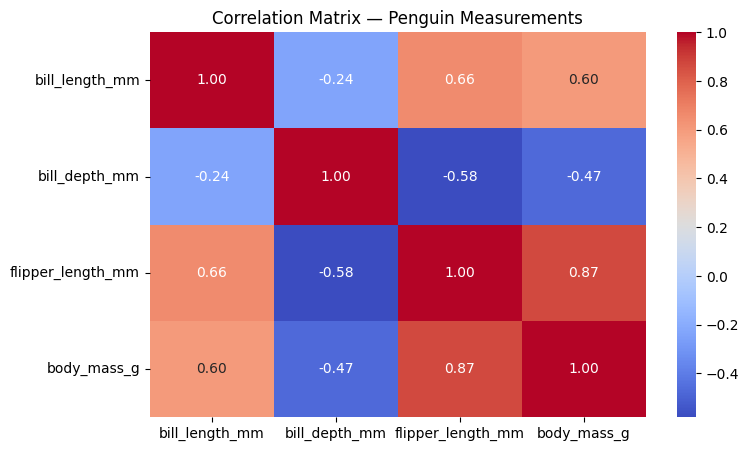

In [3]:
# Correlation matrix
num = df.select_dtypes(include=[np.number]).dropna()
corr = num.corr().round(2)

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix — Penguin Measurements")
plt.show()

**Questions:**
- Which penguin measurements show the strongest positive correlation? How about the strongest negative correlation?
- Are any variables nearly uncorrelated? What might that imply?

**Answers (Respond with 2-3 sentences per each question):**
-
- Flipper length and body mass show the strongest positive correlation (0.87), meaning that as flipper length increases, body mass tends to increase as well. Bill depth and bill length show a weak negative correlation (-0.24), suggesting a slight tendency for one to decrease as the other increases.
-  Bill length and bill depth show the weakest correlation among the numeric variables (-0.24). This relatively low correlation implies that while there's a slight inverse relationship, knowing a penguin's bill length doesn't strongly predict its bill depth, or vice versa.


## 3) Line Graph — Trend Over Time

**Instructions:** Run the cell below to display the line graph!

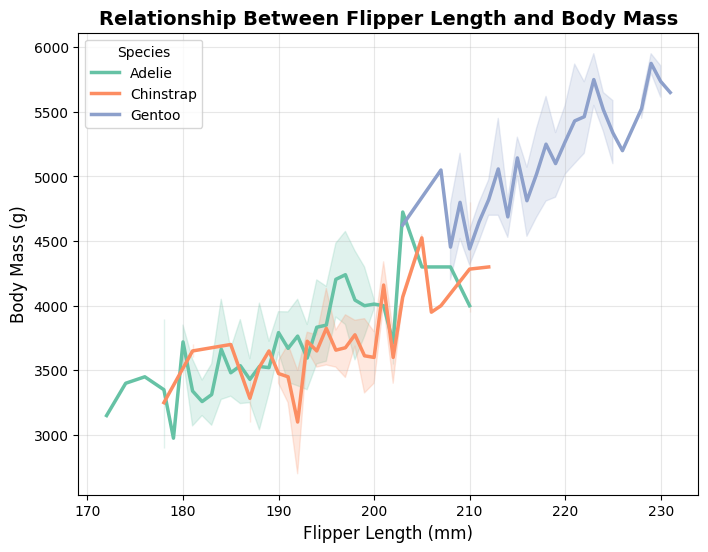

In [4]:
df = sns.load_dataset("penguins").dropna(subset=["flipper_length_mm", "body_mass_g", "species"])

# Sort values so the line graph connects in order
df = df.sort_values("flipper_length_mm")

plt.figure(figsize=(8,6))
sns.lineplot(
    data=df,
    x="flipper_length_mm",
    y="body_mass_g",
    hue="species",
    linewidth=2.5,
    palette="Set2"
)

plt.title("Relationship Between Flipper Length and Body Mass", fontsize=14, weight="bold")
plt.xlabel("Flipper Length (mm)", fontsize=12)
plt.ylabel("Body Mass (g)", fontsize=12)
plt.grid(alpha=0.3)
plt.legend(title="Species", loc="best")
plt.show()




**Questions:**
- If you saw two penguins with the same flipper length but different body masses,
what could explain the difference (think species, sex, or environment)?
- What general pattern do you notice between flipper length and body mass?
- What might explain why larger penguins also have longer flippers?

**Answers (Respond with 2-3 sentences per each question):**
-
- If two penguins had the same flipper length but different body masses, the difference could be explained by their species. As the line graph shows, for a given flipper length, different species have different body masses.
- The general pattern between flipper length and body mass is a strong positive correlation. As flipper length increases, body mass also increase across all species
- Larger penguins might have longer flippers because flippers are used for propulsion in water, and larger bodies require more power to move

## 4) Pie Chart — Proportions of a Category

**Instructions:** Plot the pie chart by running the cell below.

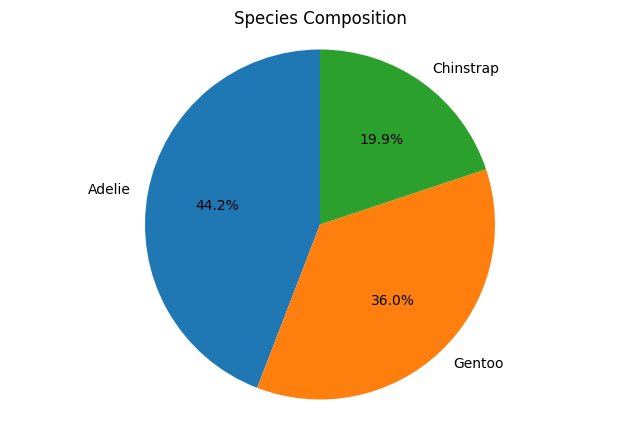

In [5]:
# Pie chart: species composition
counts = df["species"].value_counts(dropna=True)
plt.figure()
plt.pie(counts.values, labels=counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Species Composition")
plt.axis("equal")
plt.show()

**Questions:**
- Which penguin species makes up the largest part of the dataset? Which species makes up the smallest part?
- Why do you think one species might appear more often in the data than others?
- If the sample were collected differently, how might these proportions change?

**Answers (Respond with 2-3 sentences per each question):**
-
- The Adelie species makes up the largest part of the dataset (44.2%), while the Chinstrap species makes up the smallest part (19.9%).
- One species might appear more often than others due to the inconsistencey of the dataset, the number of records/data of some species would be harder to find or the data for some species would not be available at time of creating this dataset.
- If the sample were collected differently, for example, at a different location where one species is more prevalent, or during a different breeding season, the proportions of each species in the dataset would likely change.

## 5) Bar Chart — Comparing Group Averages

**Instructions**: Plot the bart chart by running the cell below.

/tmp/ipython-input-2446659581.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df, x="species", y="flipper_length_mm", ci=95, estimator=np.mean)


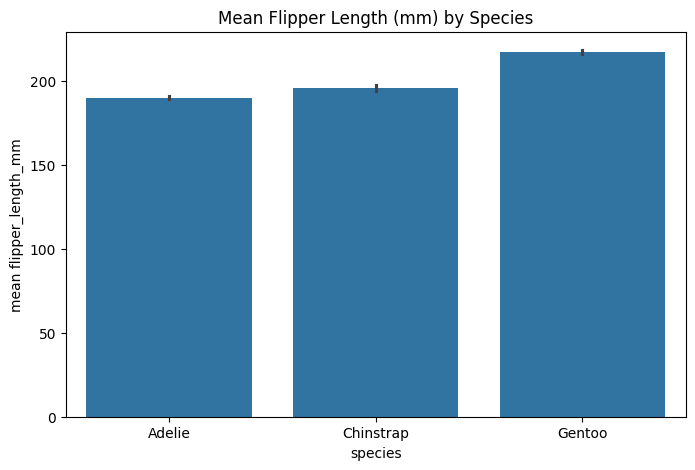

In [ ]:
# Bar chart: mean flipper length by species
sns.barplot(data=df, x="species", y="flipper_length_mm", ci=95, estimator=np.mean)
plt.title("Mean Flipper Length (mm) by Species")
plt.xlabel("species"); plt.ylabel("mean flipper_length_mm")
plt.show()

**Questions:**
- If you were explaining this chart to a friend, how would you describe the main takeaway in two sentences?
- Why might Gentoo penguins have longer flippers than the other species?
- About how many millimeters longer are Gentoo penguins’ flippers compared to Adelie penguins?

**Answers (Respond with 2-3 sentences per each question):**
-
- This bar chart shows the average flipper length for each penguin species. It clearly illustrates that Gentoo penguins have the longest average flipper length, while Adelie penguins have the shortest.
- Gentoo penguins might have longer flippers than other species because they are generally larger and heavier. Longer flippers could be an adaptation for their larger body size
- Based on the bar chart, Gentoo penguins' average flipper length is approximately 220mm, and Adelie penguins' is around 190mm. Therefore, Gentoo penguins' flippers are about 30 millimeters longer on average than Adelie penguins'.

### 💾 **Submission Instructions**

1. When you have completed all parts of this lab, save your notebook file (`.ipynb`).  
2. Create a **new repository** on your GitHub account.  
   - Name it `penguin-visualization-lab-[your_name]`
3. Upload your completed Jupyter Notebook (`.ipynb`) to that repository.  
4. Once your notebook is uploaded, **copy the link to your GitHub repository**.  
5. Go to **Google Classroom** and submit your **GitHub repository link** as your final lab submission.  

> ✅ *Make sure your repository is set to “Public” (or shareable) so we can view your work.*
